In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import trapezoid
from scipy.integrate import simpson
from scipy.integrate import solve_ivp

# Projekt 2 numerisk integration

In [41]:
def angular_velocity(t, w, w_0, y):
    t = np.array(t)
    return np.abs(((y*w_0**2)/(w_0**2-w**2))*(w_0*np.sin(w_0*t) - w*np.sin(w*t)))

def trapezoid_sol(T, N, w, w_0, y):
    t = np.linspace(0, T, N)
    y = angular_velocity(t, w, w_0, y)
    return trapezoid(y, x=t)

def third_rule_error_trapezoid(T, N, w, w_0, y):
    t1 = np.linspace(0, T, N)
    y1 = angular_velocity(t1, w, w_0, y)
    t2 = np.linspace(0, T, 2*N)
    y2 = angular_velocity(t2, w, w_0, y)

    return np.abs((trapezoid(y1, x=t1) - trapezoid(y2, x=t2))/3)

def simpson_sol(T, N, w, w_0, y):
    t = np.linspace(0, T, N)
    y = angular_velocity(t, w, w_0, y)
    return simpson(y, x=t)

def fifthenth_rule_error_simpson(T, N, w, w_0, y):
    t1 = np.linspace(0, T, N)
    y1 = angular_velocity(t1, w, w_0, y)
    t2 = np.linspace(0, T, 2*N)
    y2 = angular_velocity(t2, w, w_0, y)

    return np.abs((simpson(y1, x=t1) - simpson(y2, x=t2))/15)

def func2(t, u, w, w_0, B, y):
	a, b = u
	da_dt = b
	db_dt = -w_0**2 * np.sin(a) - 2*B*b + y*w_0**2*np.cos(w*t)
	return np.array([da_dt, db_dt])
    

## Deluppgift 1

12.033


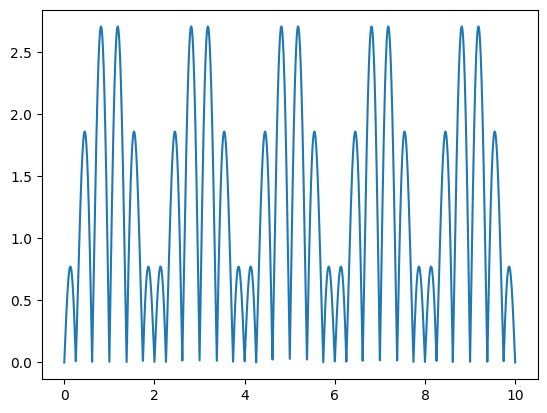

In [14]:
t = np.linspace(0, 10, 4000)
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

fig, ax = plt.subplots()
ax.plot(t, angular_velocity(t, w,w_0,y))

integral_value, error = quad(angular_velocity, 0, 10, args=(w,w_0,y), limit=50000)

print(round(integral_value, 3))


0.127


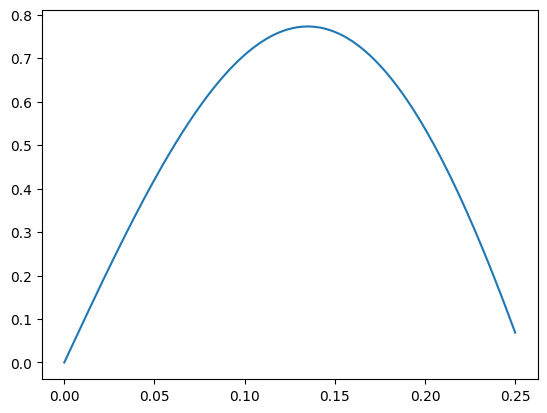

In [16]:
t = np.linspace(0, 0.25, 200)
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

fig, ax = plt.subplots()
ax.plot(t, angular_velocity(t, w,w_0,y))

integral_value, error = quad(angular_velocity, 0, 0.25, args=(w,w_0,y), limit=50000)

print(round(integral_value, 3))


## Deluppgift 2

In [26]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (100, 200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = trapezoid_sol(10, step, w, w_0, y)
    eN[step] = third_rule_error_trapezoid(10, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

{200: 1.168244368997405, 400: 2.6085195185346257, 800: 2.768037333369721}

In [40]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = simpson_sol(10, step, w, w_0, y)
    eN[step] = fifthenth_rule_error_simpson(10, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

In [ ]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (100, 200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = trapezoid_sol(0.25, step, w, w_0, y)
    eN[step] = third_rule_error_trapezoid(0.25, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

In [ ]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = simpson_sol(0.25, step, w, w_0, y)
    eN[step] = fifthenth_rule_error_simpson(0.25, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

## Deluppgift 3

In [46]:
T = 40

f = np.array([0,0])
tspan = (0,T)

w = 2*np.pi
w_0 = (3/2)*w
B = (1/4)*w_0
y = 1.07

SOL = solve_ivp(func2, tspan, f, method='RK45', args=(w, w_0, B, y))

SOL

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  3.996e+01  4.000e+01]
        y: [[ 0.000e+00  4.751e-07 ...  5.367e+00  6.005e+00]
            [ 0.000e+00  9.502e-03 ...  1.656e+01  1.871e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2996
     njev: 0
      nlu: 0

In [47]:
trapezoid(SOL.y[0])

2785.5298364650334